In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualization
sns.set_style('whitegrid')

# Enable inline plotting
%matplotlib inline

In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display basic information about the dataset
print("Titanic Dataset Shape:", titanic.shape)
print("\nFirst 5 rows of the dataset:")
titanic.head()

Titanic Dataset Shape: (891, 15)

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check for missing values
print("Missing values in each column:")
titanic.isnull().sum()

Missing values in each column:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Display the basic statistics of numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display the distribution of gender and survival
print("Distribution by gender and survival:")
survival_by_gender = pd.crosstab(titanic['sex'], titanic['survived'], normalize='index')
survival_by_gender.columns = ['Did not survive', 'Survived']
survival_by_gender

Distribution by gender and survival:


,Did not survive,Survived
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


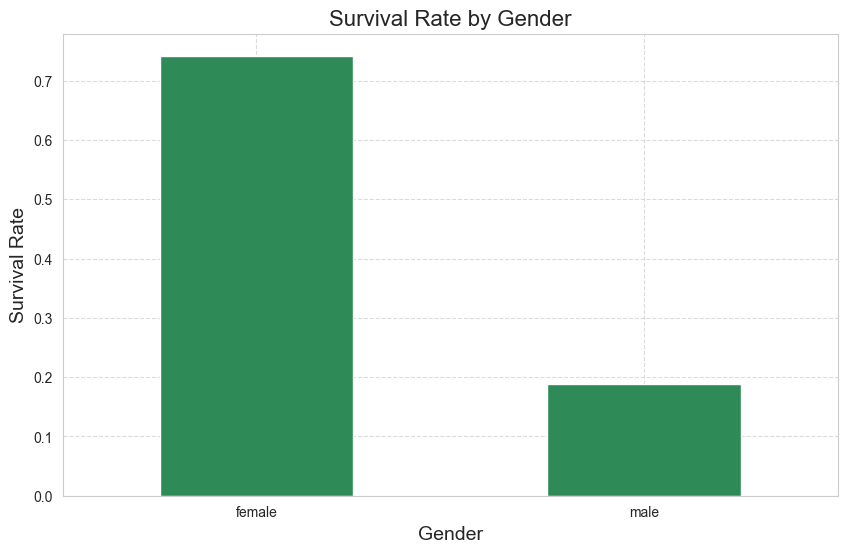

In [6]:
# Visualize the survival rate by gender
plt.figure(figsize=(10, 6))
survival_by_gender['Survived'].plot(kind='bar', color='seagreen')
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Check for missing values in relevant columns
print("Missing values in 'age' column:", titanic['age'].isnull().sum())
print("Missing values in 'sex' column:", titanic['sex'].isnull().sum())
print("Missing values in 'survived' column:", titanic['survived'].isnull().sum())

Missing values in 'age' column: 177
Missing values in 'sex' column: 0
Missing values in 'survived' column: 0


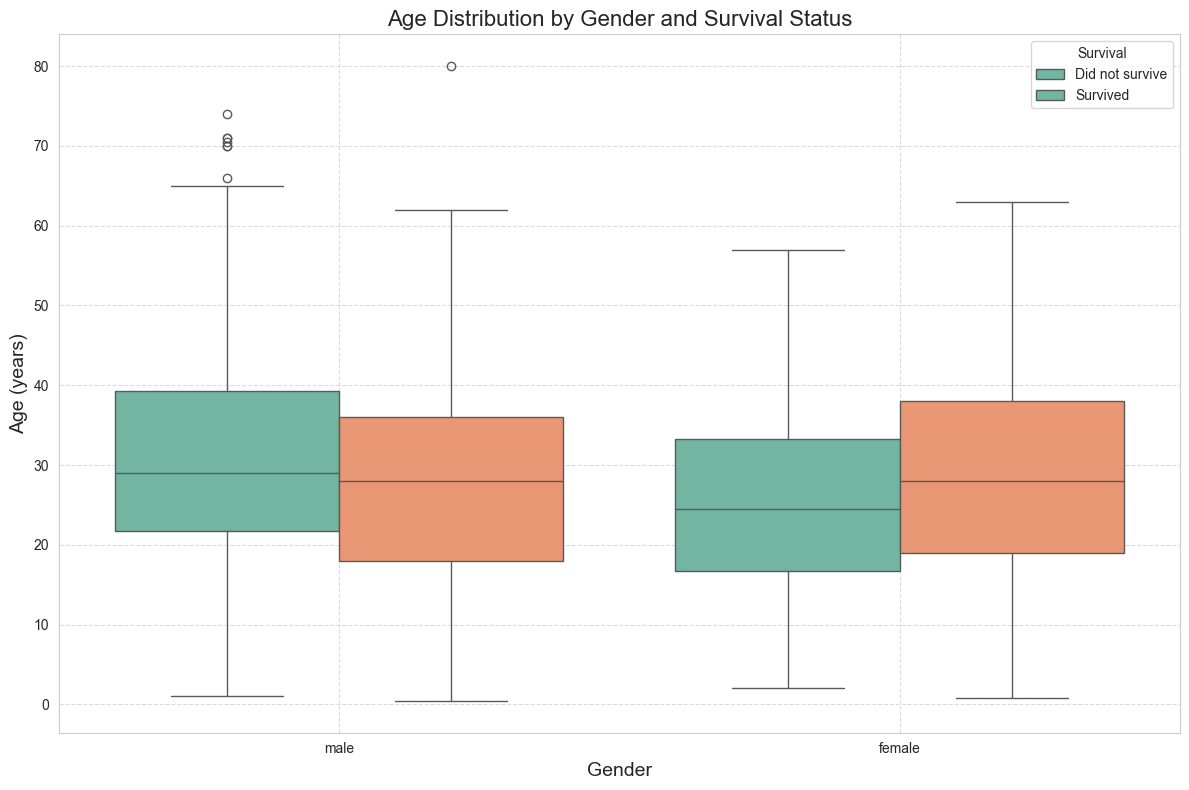

In [8]:
# Create box plot for age distribution by gender and survival status
plt.figure(figsize=(12, 8))
# The order parameter ensures consistent color mapping
sns.boxplot(x='sex', y='age', hue='survived', data=titanic, palette='Set2')

# Customize the plot
plt.title('Age Distribution by Gender and Survival Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age (years)', fontsize=14)
plt.legend(title='Survival', labels=['Did not survive', 'Survived'])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Calculate median age by gender and survival status
median_ages = titanic.groupby(['sex', 'survived'])['age'].median().reset_index()
median_ages.columns = ['Gender', 'Survived', 'Median Age']
median_ages['Survived'] = median_ages['Survived'].map({0: 'Did not survive', 1: 'Survived'})
print("Median ages by gender and survival status:")
median_ages

Median ages by gender and survival status:


,Gender,Survived,Median Age
0,female,Did not survive,24.5
1,female,Survived,28.0
2,male,Did not survive,29.0
3,male,Survived,28.0


In [10]:
# Calculate age statistics for children vs adults by survival status
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 100], labels=['Child', 'Adult'])
age_survival = pd.crosstab(titanic['age_group'], titanic['survived'], normalize='index')
age_survival.columns = ['Did not survive', 'Survived']
print("Survival rates by age group:")
age_survival

Survival rates by age group:


,Did not survive,Survived
age_group,,
Child,0.496403,0.503597
Adult,0.617391,0.382609


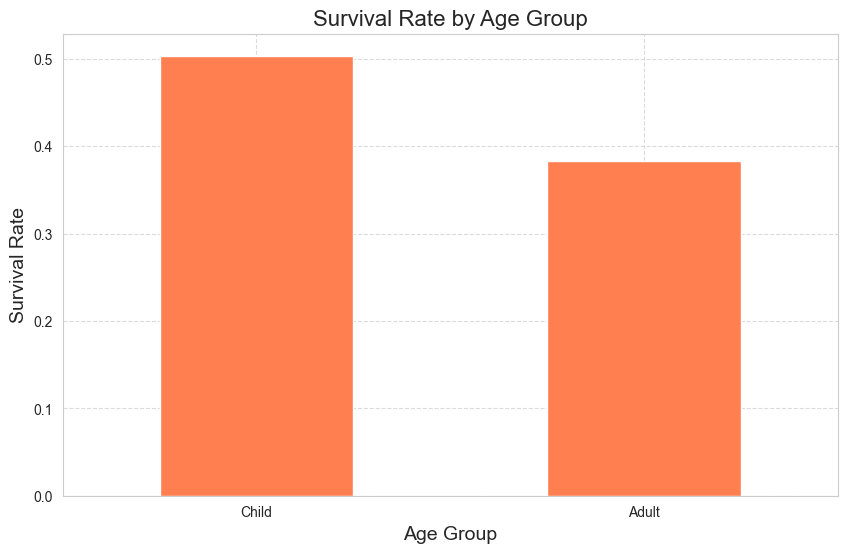

In [11]:
# Visualize survival rates by age group
plt.figure(figsize=(10, 6))
age_survival['Survived'].plot(kind='bar', color='coral')
plt.title('Survival Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Check for missing values in fare column
print("Missing values in fare column:", titanic['fare'].isnull().sum())

Missing values in fare column: 0


In [13]:
# Print statistics about the fare column
print("Statistics for fare column:")
titanic['fare'].describe()

Statistics for fare column:


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

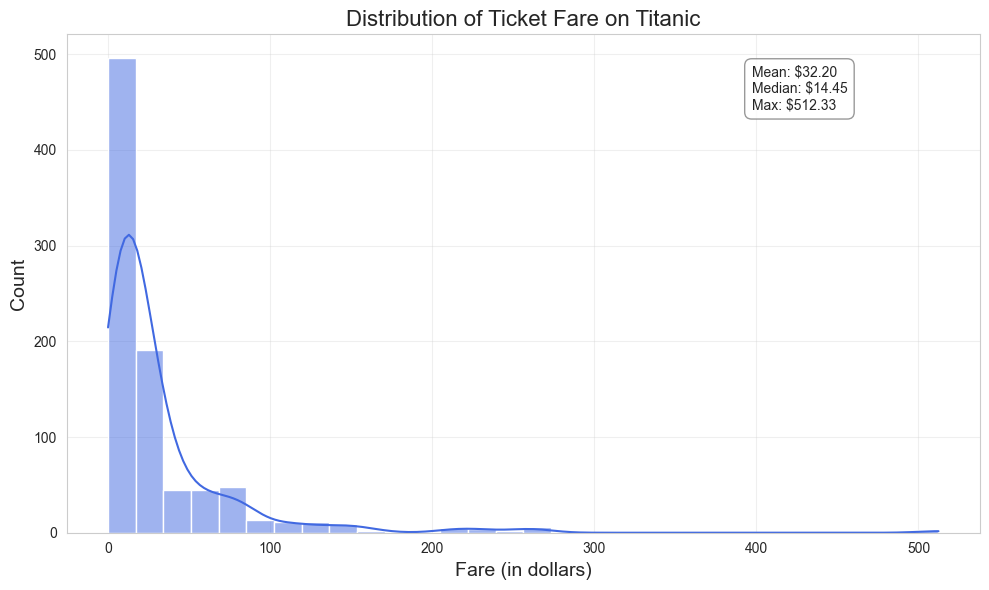

In [14]:
# Plot histogram for fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='fare', bins=30, kde=True, color='royalblue')
plt.title('Distribution of Ticket Fare on Titanic', fontsize=16)
plt.xlabel('Fare (in dollars)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)

# Add some statistics as text on the plot
stats = titanic['fare'].describe()
stats_text = f"Mean: ${stats['mean']:.2f}\nMedian: ${stats['50%']:.2f}\nMax: ${stats['max']:.2f}"
plt.annotate(stats_text, xy=(0.75, 0.85), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

In [15]:
# Create fare categories
titanic['fare_category'] = pd.qcut(titanic['fare'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Calculate survival rates by fare category
fare_survival = pd.crosstab(titanic['fare_category'], titanic['survived'], normalize='index')
fare_survival.columns = ['Did not survive', 'Survived']
print("Survival rates by fare category:")
fare_survival

Survival rates by fare category:


,Did not survive,Survived
fare_category,,
Low,0.802691,0.197309
Medium-Low,0.696429,0.303571
Medium-High,0.545045,0.454955
High,0.418919,0.581081


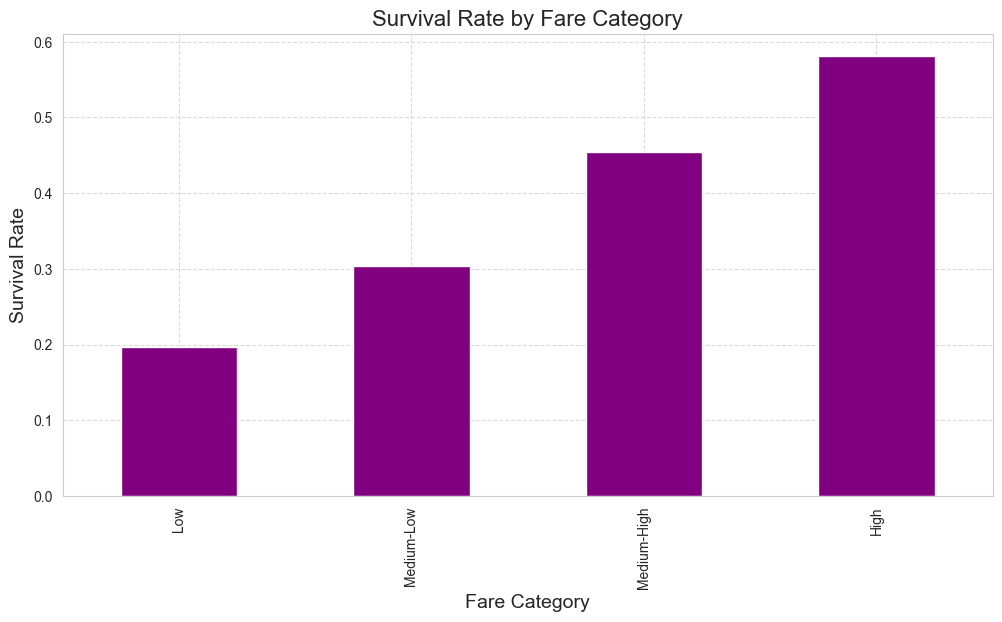

In [16]:
# Visualize survival rates by fare category
plt.figure(figsize=(12, 6))
fare_survival['Survived'].plot(kind='bar', color='purple')
plt.title('Survival Rate by Fare Category', fontsize=16)
plt.xlabel('Fare Category', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/var/folders/c3/02z5_v456blb2nhq7w9995kw0000gn/T/ipykernel_4061/3941129681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=titanic, palette='Set3')


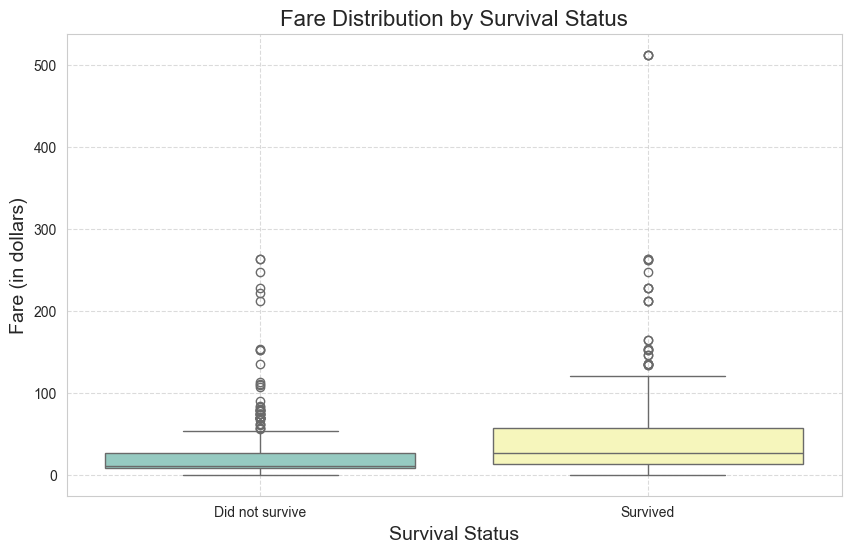

In [17]:
# Visualize fare distribution by survival status
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', data=titanic, palette='Set3')
plt.title('Fare Distribution by Survival Status', fontsize=16)
plt.xlabel('Survival Status', fontsize=14)
plt.ylabel('Fare (in dollars)', fontsize=14)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/var/folders/c3/02z5_v456blb2nhq7w9995kw0000gn/T/ipykernel_4061/551368285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=titanic, palette='viridis')


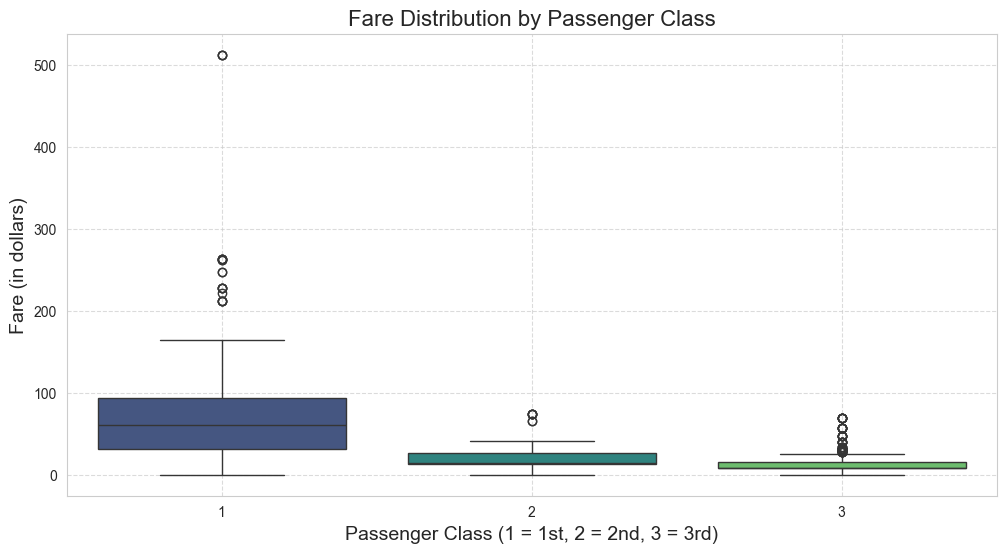

In [18]:
# Visualize fare distribution by passenger class
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', data=titanic, palette='viridis')
plt.title('Fare Distribution by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=14)
plt.ylabel('Fare (in dollars)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Survival rate by passenger class and gender
class_gender_survival = titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()
print("Survival rate by passenger class and gender:")
class_gender_survival

Survival rate by passenger class and gender:


sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


<Figure size 1200x600 with 0 Axes>

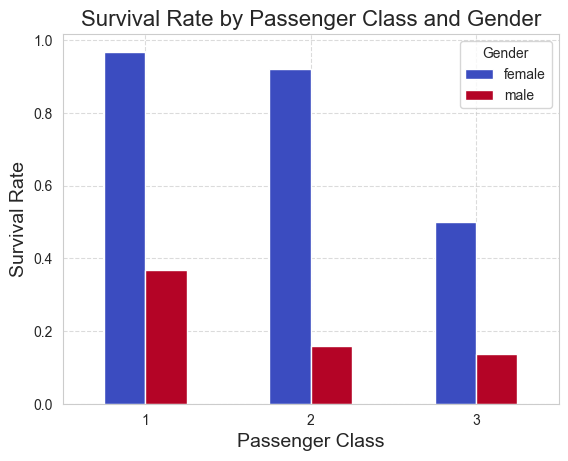

In [20]:
# Visualize survival rate by passenger class and gender
plt.figure(figsize=(12, 6))
class_gender_survival.plot(kind='bar', colormap='coolwarm')
plt.title('Survival Rate by Passenger Class and Gender', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()